# Neurons and Layers

We will first learn how to implement layers in using the tensorflow and how they are similar to the classic Linear and Logistic Regression

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError , BinaryCrossentropy
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
plt.style.use("ggplot")

## Regression/Linear Model

### First Define some data points and plot that data points

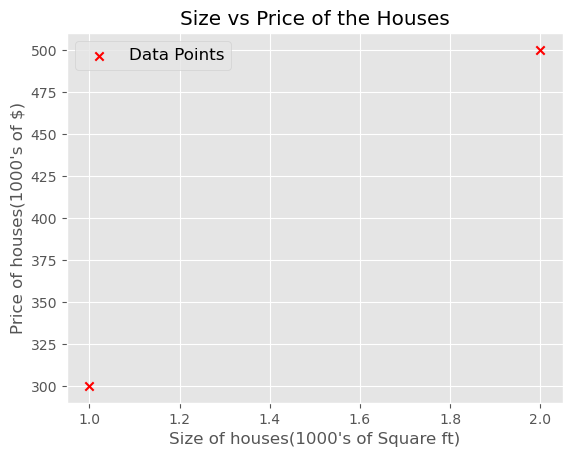

In [10]:
import numpy as np

X_train = np.array([[1.0], [2.0]])
y_train = np.array([[300.0], [500.0]])

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, y_train, marker="x", c="r", label="Data Points")
ax.set_xlabel("Size of houses(1000's of Square ft)")
ax.set_ylabel("Price of houses(1000's of $)")
ax.set_title("Size vs Price of the Houses")

ax.legend(fontsize="large")
plt.show()

### The formula for predecting the values in Linear Regression was 

$$f_{w, b}(\mathbf{x}^{(i)}) = \mathbf{w}\cdot \mathbf{x}^{(i)} + b$$

We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [6]:
linear_layer = Dense(units=1, activation='linear')

In [7]:
linear_layer.get_weights()

[]

Initially the weights of the layer are not defined we have to provide it some data

In [13]:
a1 = linear_layer(X_train[0].reshape(1, 1))

In [12]:
linear_layer.get_weights()

[array([[-0.7873219]], dtype=float32), array([0.], dtype=float32)]

In [14]:
print(a1)

tf.Tensor([[-0.7873219]], shape=(1, 1), dtype=float32)


### Lets set the initiallay known weights for the parameters

In [16]:
w = np.array([[200]])
b = np.array([100])

linear_layer.set_weights([w, b])

In [17]:
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

## Lets predict the values using the Layer as well as Linear prediction model

In [18]:
pred_layer = linear_layer(X_train[0].reshape(1, 1))
pred_linear = np.dot(X_train[0], w) + b

print(pred_layer)
print(pred_linear)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[300.]


In [19]:
prediction_layer = linear_layer(X_train)

In [20]:
print(prediction_layer)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)


In [21]:
prediction_linear = X_train @ w + b

In [22]:
print(prediction_linear)

[[300.]
 [500.]]


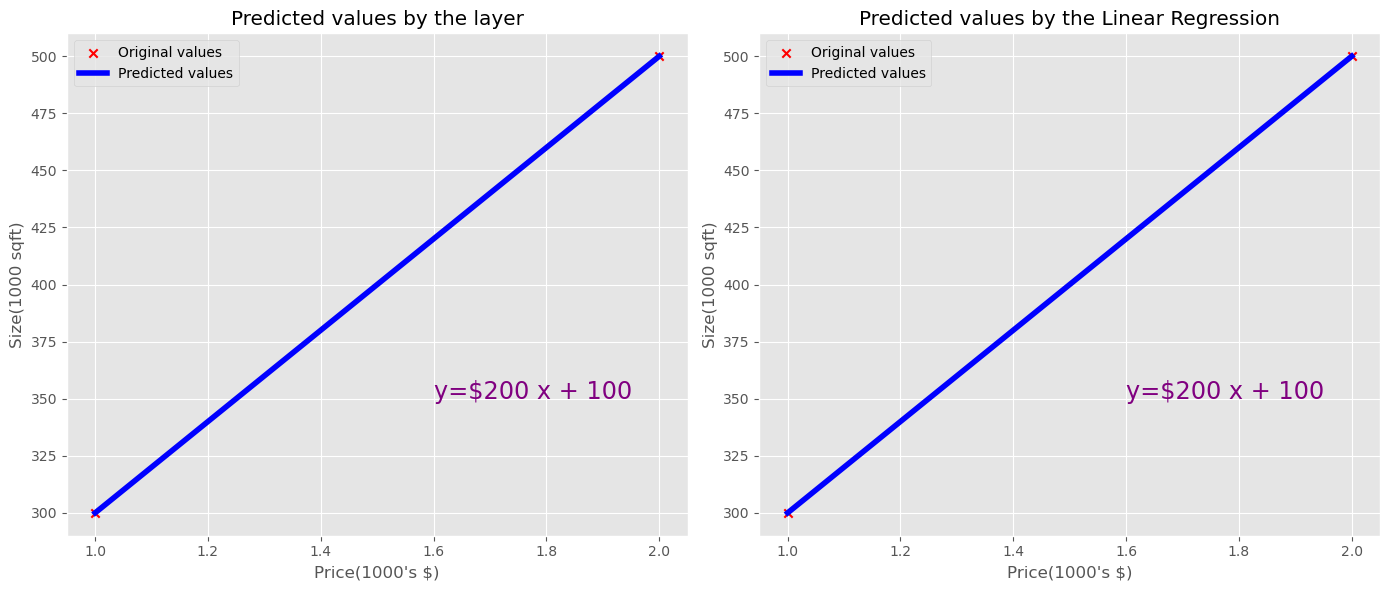

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(X_train, y_train, marker="x", c="r", label="Original values")
ax[0].plot(X_train, prediction_layer, lw=4, c='b', label='Predicted values')
ax[0].text(1.6, 350, r"y=$200 x + 100", color="purple", fontsize="xx-large")
ax[0].set_title("Predicted values by the layer")
ax[0].set_xlabel("Price(1000's $)")
ax[0].set_ylabel("Size(1000 sqft)")
ax[0].legend()

ax[1].scatter(X_train, y_train, marker="x", c="r", label="Original values")
ax[1].plot(X_train, prediction_linear, lw=4, c='b', label='Predicted values')
ax[1].text(1.6, 350, r"y=$200 x + 100", color="purple", fontsize="xx-large")
ax[1].set_title("Predicted values by the Linear Regression")
ax[1].set_xlabel("Price(1000's $)")
ax[1].set_ylabel("Size(1000 sqft)")
ax[1].legend()

plt.tight_layout()
plt.show()